In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os.path import isfile, join
import os

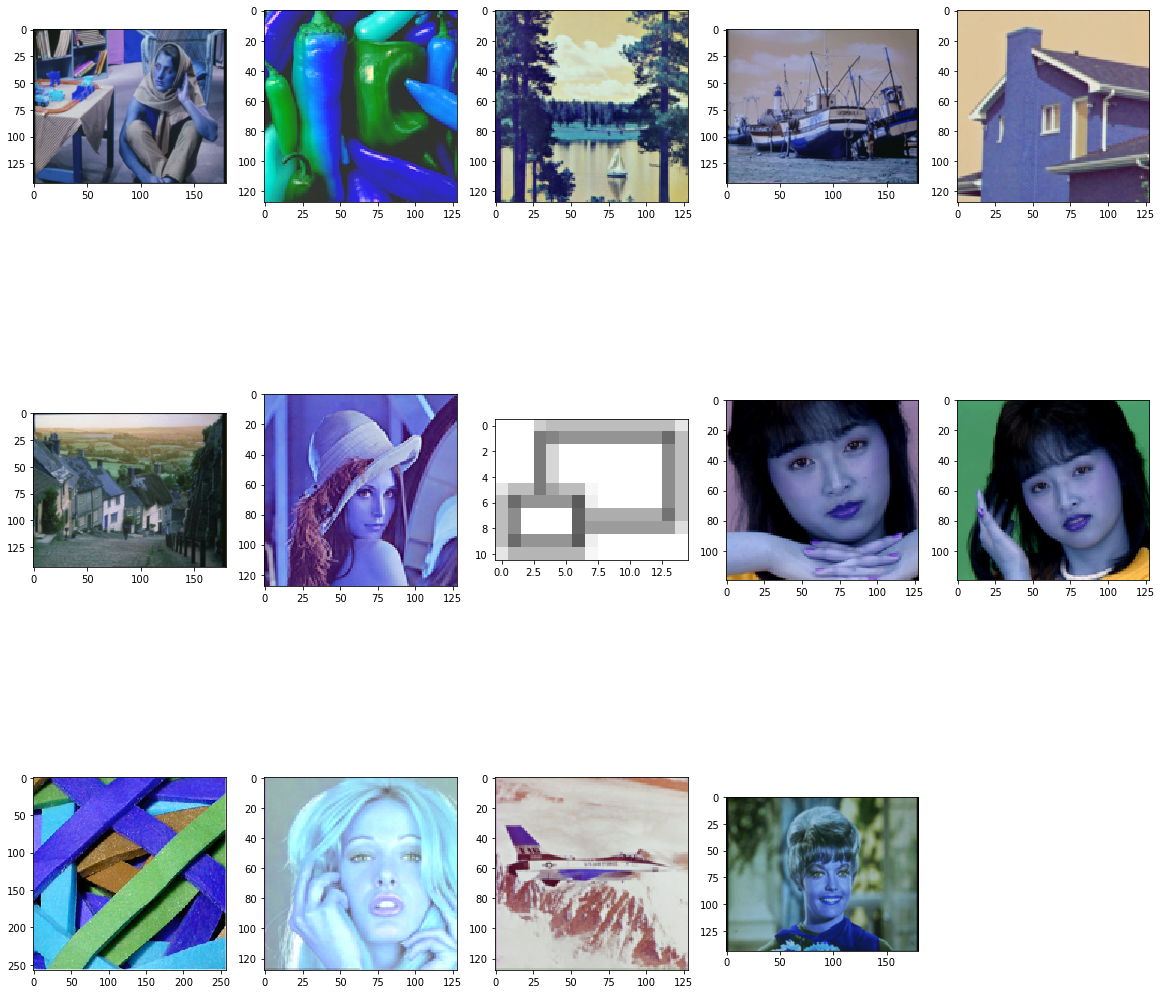

In [2]:
images = []
dir = "C:\\Users\\Mustafa\\testresim"
paths = os.listdir(dir)

for path in paths:
    full_path = join(dir, path)
    image = cv2.imread(full_path)
    images.append(image)

plt.figure(figsize =(20,20))
columns = 5

for i,image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

In [4]:
b,g,r = cv2.split(images[0])
rows, cols = b.shape
print(rows, cols)

deneme = np.array([])
# matrix2vector
for i in range(rows):
    if i % 2 == 0:
        deneme = np.append(deneme,b[i,:])
    else:
        arr = b[i,:]
        reversed_arr = arr[::-1]
        deneme = np.append(deneme,reversed_arr)
        
print(deneme.shape)        

(144L, 180L)
(25920L,)
